Importing Libraries


In [0]:
#For numerical libraries
import numpy as np
#To handle data in the form of rows and columns
import pandas as pd
#importing seaborn for statistical plots
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing the feature scaling library
from sklearn.preprocessing import StandardScaler
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
# Import support vector regressor machine learning library
from sklearn.svm import SVR
#Import the metrics
from sklearn import metrics
#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore
#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
#importing the preprocessing library
from sklearn import preprocessing
# importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
#importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample

In [2]:
#reading the CSV file into pandas dataframe
concrete_df=pd.read_csv('concrete.csv')
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


It shows that there are eight independent variables ( cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one dependent variable (strength). All the records are numeric.

In [3]:
#Check the last few records of the dataset
concrete_df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


Exploratory Data Quality Report:

Univariate analysis

In [4]:
#To show the detailed summary 
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


It gives the details about the number of rows (1030), number of columns (9), data types information i.e. except age which is integer type all other columns are float type. Also,there are no null values in the data.

In [5]:
# Data types information
concrete_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [6]:
#To get the shape 
concrete_df.shape

(1030, 9)

In [7]:
#Analyze the distribution of the dataset
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) and count of the columns of the dataset.
We can see that cement,slag,ash are left skewed.

In [8]:
print('Range of values: ', concrete_df['cement'].max()-concrete_df['cement'].min())

Range of values:  438.0


In [9]:
print('Minimum age: ', concrete_df['cement'].min())
print('Maximum age: ',concrete_df['cement'].max())
print('Mean value: ', concrete_df['cement'].mean())
print('Median value: ',concrete_df['cement'].median())
print('Standard deviation: ', concrete_df['cement'].std())

Minimum age:  102.0
Maximum age:  540.0
Mean value:  281.1678640776698
Median value:  272.9
Standard deviation:  104.50636449481536


In [10]:
Q1=concrete_df['cement'].quantile(q=0.25)
Q3=concrete_df['cement'].quantile(q=0.75)
print('1st Quartile for cement (Q1) is: ', Q1)
print('3st Quartile for cement (Q3) is: ', Q3)
print('Interquartile range for cement (IQR) is ', stats.iqr(concrete_df['cement']))

1st Quartile for cement (Q1) is:  192.375
3st Quartile for cement (Q3) is:  350.0
Interquartile range for cement (IQR) is  157.625


In [11]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in cement: ', L_outliers)
print('Upper outliers in cement: ', U_outliers)

Lower outliers in cement:  -44.0625
Upper outliers in cement:  586.4375


In [12]:
print('Number of outliers in cement upper : ', concrete_df[concrete_df['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower : ', concrete_df[concrete_df['cement']<-44.0625]['cement'].count())
print('% of Outlier in cement upper: ',round(concrete_df[concrete_df['cement']>586.4375]['cement'].count()*100/len(concrete_df)), '%')
print('% of Outlier in cement lower: ',round(concrete_df[concrete_df['cement']<-44.0625]['cement'].count()*100/len(concrete_df)), '%')

Number of outliers in cement upper :  0
Number of outliers in cement lower :  0
% of Outlier in cement upper:  0.0 %
% of Outlier in cement lower:  0.0 %


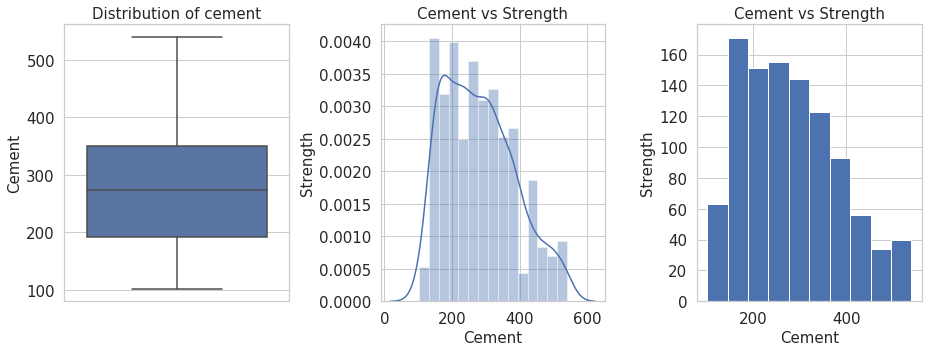

In [13]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='cement',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Cement', fontsize=15)
ax1.set_title('Distribution of cement', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['cement'],ax=ax2)
ax2.set_xlabel('Cement', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Cement vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['cement'])
ax3.set_xlabel('Cement', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Cement vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

**SLAG**

In [14]:
print('Range of values - Slag: ', concrete_df['slag'].max()-concrete_df['slag'].min())
print('Minimum slag: ', concrete_df['slag'].min())
print('Maximum slag: ',concrete_df['slag'].max())
print('Mean value: ', concrete_df['slag'].mean())
print('Median value: ',concrete_df['slag'].median())
print('Standard deviation: ', concrete_df['slag'].std())
print('Null values: ',concrete_df['slag'].isnull().any())

Range of values - Slag:  359.4
Minimum slag:  0.0
Maximum slag:  359.4
Mean value:  73.89582524271844
Median value:  22.0
Standard deviation:  86.2793417481054
Null values:  False


In [15]:
Q1=concrete_df['slag'].quantile(q=0.25)
Q3=concrete_df['slag'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['slag']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in slag: ', L_outliers)
print('Upper outliers in slag: ', U_outliers)
print('Number of outliers in slag upper : ', concrete_df[concrete_df['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower : ', concrete_df[concrete_df['slag']<-214.425]['slag'].count())
print('% of Outlier in slag upper: ',round(concrete_df[concrete_df['slag']>357.375]['slag'].count()*100/len(concrete_df)), '%')
print('% of Outlier in slag lower: ',round(concrete_df[concrete_df['slag']<-214.425]['slag'].count()*100/len(concrete_df)), '%')

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  142.95
Interquartile range (IQR) is  142.95
Lower outliers in slag:  -214.42499999999998
Upper outliers in slag:  357.375
Number of outliers in slag upper :  2
Number of outliers in slag lower :  0
% of Outlier in slag upper:  0.0 %
% of Outlier in slag lower:  0.0 %


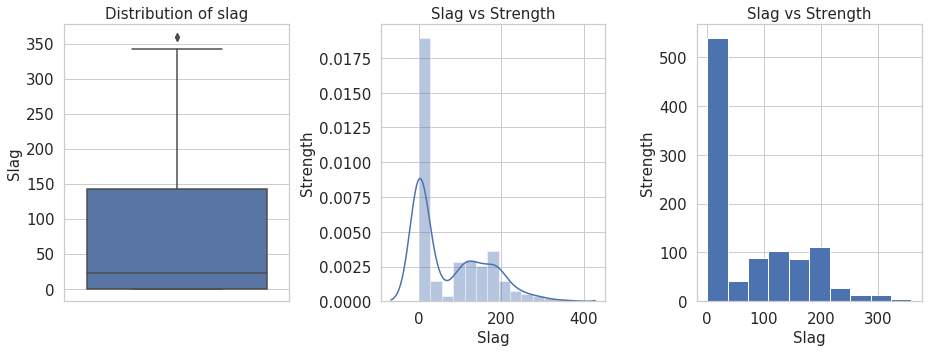

In [16]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='slag',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Slag', fontsize=15)
ax1.set_title('Distribution of slag', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['slag'],ax=ax2)
ax2.set_xlabel('Slag', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Slag vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['slag'])
ax3.set_xlabel('Slag', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Slag vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

**Ash**

In [17]:
print('Range of values: ', concrete_df['ash'].max()-concrete_df['ash'].min())
print('Minimum ash: ', concrete_df['ash'].min())
print('Maximum ash: ',concrete_df['ash'].max())
print('Mean value: ', concrete_df['ash'].mean())
print('Median value: ',concrete_df['ash'].median())
print('Standard deviation: ', concrete_df['ash'].std())
Q1=concrete_df['ash'].quantile(q=0.25)
Q3=concrete_df['ash'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['ash']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in ash: ', L_outliers)
print('Upper outliers in ash: ', U_outliers)
print('Number of outliers in ash upper : ', concrete_df[concrete_df['ash']>295.75]['ash'].count())
print('Number of outliers in ash lower : ', concrete_df[concrete_df['ash']<-177.45]['ash'].count())
print('% of Outlier in ash upper: ',round(concrete_df[concrete_df['ash']>295.75]['ash'].count()*100/len(concrete_df)), '%')
print('% of Outlier in ash lower: ',round(concrete_df[concrete_df['ash']<-177.45]['ash'].count()*100/len(concrete_df)), '%')

Range of values:  200.1
Minimum ash:  0.0
Maximum ash:  200.1
Mean value:  54.188349514563086
Median value:  0.0
Standard deviation:  63.99700415268794
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  118.3
Interquartile range (IQR) is  118.3
Lower outliers in ash:  -177.45
Upper outliers in ash:  295.75
Number of outliers in ash upper :  0
Number of outliers in ash lower :  0
% of Outlier in ash upper:  0.0 %
% of Outlier in ash lower:  0.0 %


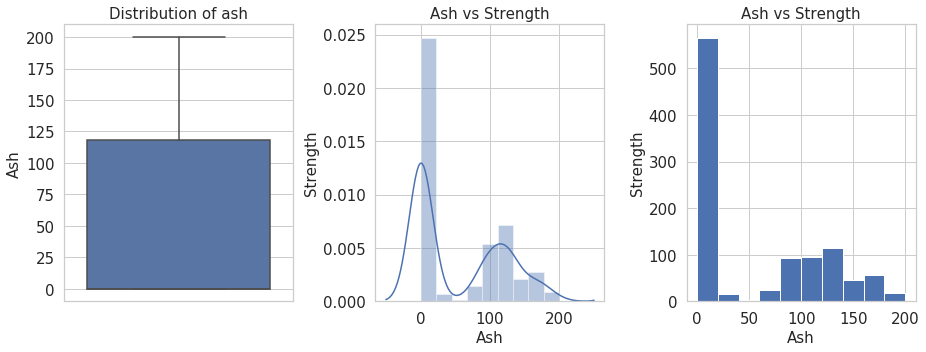

In [18]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='ash',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Ash', fontsize=15)
ax1.set_title('Distribution of ash', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['ash'],ax=ax2)
ax2.set_xlabel('Ash', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Ash vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['ash'])
ax3.set_xlabel('Ash', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Ash vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

**Water**

In [19]:
print('Range of values: ', concrete_df['water'].max()-concrete_df['water'].min())
print('Minimum water: ', concrete_df['water'].min())
print('Maximum water: ',concrete_df['water'].max())
print('Mean value: ', concrete_df['water'].mean())
print('Median value: ',concrete_df['water'].median())
print('Standard deviation: ', concrete_df['water'].std())
print('Null values: ',concrete_df['water'].isnull().any())
Q1=concrete_df['water'].quantile(q=0.25)
Q3=concrete_df['water'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['water']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in water: ', L_outliers)
print('Upper outliers in water: ', U_outliers)
print('Number of outliers in water upper : ', concrete_df[concrete_df['water']>232.65]['water'].count())
print('Number of outliers in water lower : ', concrete_df[concrete_df['water']<124.25]['water'].count())
print('% of Outlier in water upper: ',round(concrete_df[concrete_df['water']>232.65]['water'].count()*100/len(concrete_df)), '%')
print('% of Outlier in water lower: ',round(concrete_df[concrete_df['water']<124.25]['water'].count()*100/len(concrete_df)), '%')

Range of values:  125.2
Minimum water:  121.8
Maximum water:  247.0
Mean value:  181.56728155339798
Median value:  185.0
Standard deviation:  21.35421856503245
Null values:  False
1st Quartile (Q1) is:  164.9
3st Quartile (Q3) is:  192.0
Interquartile range (IQR) is  27.099999999999994
Lower outliers in water:  124.25000000000001
Upper outliers in water:  232.64999999999998
Number of outliers in water upper :  4
Number of outliers in water lower :  5
% of Outlier in water upper:  0.0 %
% of Outlier in water lower:  0.0 %


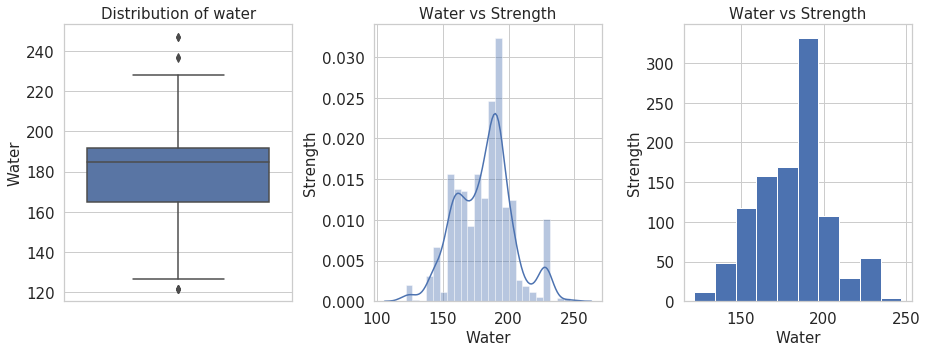

In [20]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='water',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Water', fontsize=15)
ax1.set_title('Distribution of water', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['water'],ax=ax2)
ax2.set_xlabel('Water', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Water vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['water'])
ax3.set_xlabel('Water', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Water vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

**Superplastic**

In [21]:
print('Range of values: ', concrete_df['superplastic'].max()-concrete_df['superplastic'].min())
print('Minimum superplastic: ', concrete_df['superplastic'].min())
print('Maximum superplastic: ',concrete_df['superplastic'].max())
print('Mean value: ', concrete_df['superplastic'].mean())
print('Median value: ',concrete_df['superplastic'].median())
print('Standard deviation: ', concrete_df['superplastic'].std())
print('Null values: ',concrete_df['superplastic'].isnull().any())
Q1=concrete_df['superplastic'].quantile(q=0.25)
Q3=concrete_df['superplastic'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['superplastic']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in superplastic: ', L_outliers)
print('Upper outliers in superplastic: ', U_outliers)
print('Number of outliers in superplastic upper : ', concrete_df[concrete_df['superplastic']>25.5]['superplastic'].count())
print('Number of outliers in superplastic lower : ', concrete_df[concrete_df['superplastic']<-15.3]['superplastic'].count())
print('% of Outlier in superplastic upper: ',round(concrete_df[concrete_df['superplastic']>25.5]['superplastic'].count()*100/len(concrete_df)), '%')
print('% of Outlier in superplastic lower: ',round(concrete_df[concrete_df['superplastic']<-15.3]['superplastic'].count()*100/len(concrete_df)), '%')

Range of values:  32.2
Minimum superplastic:  0.0
Maximum superplastic:  32.2
Mean value:  6.204660194174756
Median value:  6.4
Standard deviation:  5.973841392485508
Null values:  False
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  10.2
Interquartile range (IQR) is  10.2
Lower outliers in superplastic:  -15.299999999999999
Upper outliers in superplastic:  25.5
Number of outliers in superplastic upper :  10
Number of outliers in superplastic lower :  0
% of Outlier in superplastic upper:  1.0 %
% of Outlier in superplastic lower:  0.0 %


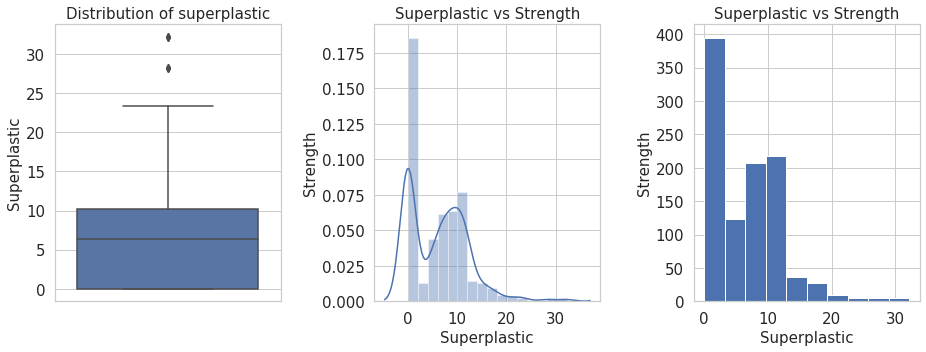

In [22]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='superplastic',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Superplastic', fontsize=15)
ax1.set_title('Distribution of superplastic', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['superplastic'],ax=ax2)
ax2.set_xlabel('Superplastic', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Superplastic vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['superplastic'])
ax3.set_xlabel('Superplastic', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Superplastic vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

**Coarseagg**

In [23]:
print('Range of values: ', concrete_df['coarseagg'].max()-concrete_df['coarseagg'].min())
print('Minimum value: ', concrete_df['coarseagg'].min())
print('Maximum value: ',concrete_df['coarseagg'].max())
print('Mean value: ', concrete_df['coarseagg'].mean())
print('Median value: ',concrete_df['coarseagg'].median())
print('Standard deviation: ', concrete_df['coarseagg'].std())
print('Null values: ',concrete_df['coarseagg'].isnull().any())
Q1=concrete_df['coarseagg'].quantile(q=0.25)
Q3=concrete_df['coarseagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['coarseagg']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in coarseagg: ', L_outliers)
print('Upper outliers in coarseagg: ', U_outliers)
print('Number of outliers in coarseagg upper : ', concrete_df[concrete_df['coarseagg']>1175.5]['coarseagg'].count())
print('Number of outliers in coarseagg lower : ', concrete_df[concrete_df['coarseagg']<785.9]['coarseagg'].count())
print('% of Outlier in coarseagg upper: ',round(concrete_df[concrete_df['coarseagg']>1175.5]['coarseagg'].count()*100/len(concrete_df)), '%')
print('% of Outlier in coarseagg lower: ',round(concrete_df[concrete_df['coarseagg']<785.9]['coarseagg'].count()*100/len(concrete_df)), '%')

Range of values:  344.0
Minimum value:  801.0
Maximum value:  1145.0
Mean value:  972.918932038835
Median value:  968.0
Standard deviation:  77.75395396672087
Null values:  False
1st Quartile (Q1) is:  932.0
3st Quartile (Q3) is:  1029.4
Interquartile range (IQR) is  97.40000000000009
Lower outliers in coarseagg:  785.8999999999999
Upper outliers in coarseagg:  1175.5000000000002
Number of outliers in coarseagg upper :  0
Number of outliers in coarseagg lower :  0
% of Outlier in coarseagg upper:  0.0 %
% of Outlier in coarseagg lower:  0.0 %


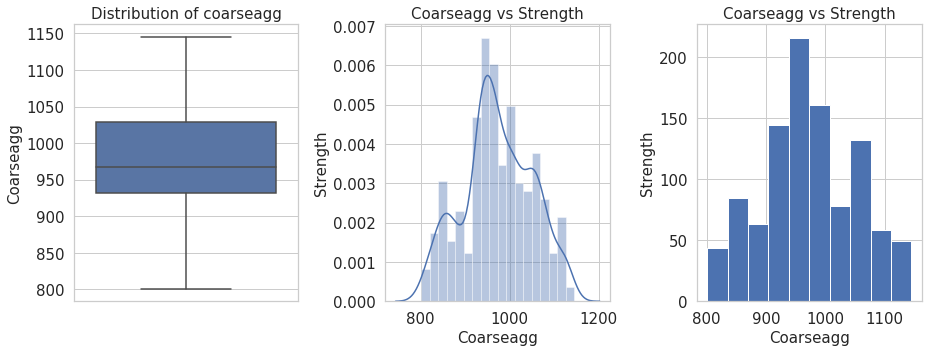

In [24]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='coarseagg',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Coarseagg', fontsize=15)
ax1.set_title('Distribution of coarseagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['coarseagg'],ax=ax2)
ax2.set_xlabel('Coarseagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Coarseagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['coarseagg'])
ax3.set_xlabel('Coarseagg', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Coarseagg vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

**Fineagg**

In [25]:
print('Range of values: ', concrete_df['fineagg'].max()-concrete_df['fineagg'].min())
print('Minimum value: ', concrete_df['fineagg'].min())
print('Maximum value: ',concrete_df['fineagg'].max())
print('Mean value: ', concrete_df['fineagg'].mean())
print('Median value: ',concrete_df['fineagg'].median())
print('Standard deviation: ', concrete_df['fineagg'].std())
print('Null values: ',concrete_df['fineagg'].isnull().any())
Q1=concrete_df['fineagg'].quantile(q=0.25)
Q3=concrete_df['fineagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['fineagg']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in fineagg: ', L_outliers)
print('Upper outliers in fineagg: ', U_outliers)
print('Number of outliers in fineagg upper : ', concrete_df[concrete_df['fineagg']>963.575]['fineagg'].count())
print('Number of outliers in fineagg lower : ', concrete_df[concrete_df['fineagg']<591.37]['fineagg'].count())
print('% of Outlier in fineagg upper: ',round(concrete_df[concrete_df['fineagg']>963.575]['fineagg'].count()*100/len(concrete_df)), '%')
print('% of Outlier in fineagg lower: ',round(concrete_df[concrete_df['fineagg']<591.37]['fineagg'].count()*100/len(concrete_df)), '%')

Range of values:  398.6
Minimum value:  594.0
Maximum value:  992.6
Mean value:  773.5804854368932
Median value:  779.5
Standard deviation:  80.17598014240443
Null values:  False
1st Quartile (Q1) is:  730.9499999999999
3st Quartile (Q3) is:  824.0
Interquartile range (IQR) is  93.05000000000007
Lower outliers in fineagg:  591.3749999999998
Upper outliers in fineagg:  963.575
Number of outliers in fineagg upper :  5
Number of outliers in fineagg lower :  0
% of Outlier in fineagg upper:  0.0 %
% of Outlier in fineagg lower:  0.0 %


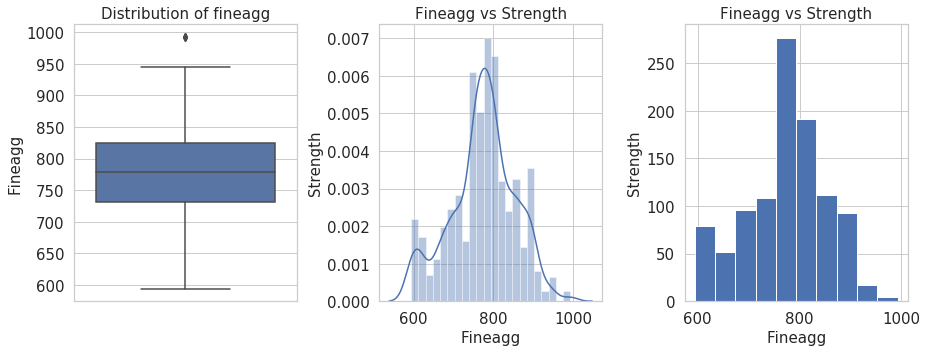

In [26]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='fineagg',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Fineagg', fontsize=15)
ax1.set_title('Distribution of fineagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['fineagg'],ax=ax2)
ax2.set_xlabel('Fineagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Fineagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['fineagg'])
ax3.set_xlabel('Fineagg', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Fineagg vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

**Age**

In [27]:
print('Range of values: ', concrete_df['age'].max()-concrete_df['age'].min())
print('Minimum age: ', concrete_df['age'].min())
print('Maximum age: ',concrete_df['age'].max())
print('Mean value: ', concrete_df['age'].mean())
print('Median value: ',concrete_df['age'].median())
print('Standard deviation: ', concrete_df['age'].std())
print('Null values: ',concrete_df['age'].isnull().any())
Q1=concrete_df['age'].quantile(q=0.25)
Q3=concrete_df['age'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['age']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in age: ', L_outliers)
print('Upper outliers in age: ', U_outliers)
print('Number of outliers in age upper : ', concrete_df[concrete_df['age']>129.5]['age'].count())
print('Number of outliers in age lower : ', concrete_df[concrete_df['age']<-66.5]['age'].count())
print('% of Outlier in age upper: ',round(concrete_df[concrete_df['age']>129.5]['age'].count()*100/len(concrete_df)), '%')
print('% of Outlier in age lower: ',round(concrete_df[concrete_df['age']<-66.5]['age'].count()*100/len(concrete_df)), '%')

Range of values:  364
Minimum age:  1
Maximum age:  365
Mean value:  45.662135922330094
Median value:  28.0
Standard deviation:  63.16991158103279
Null values:  False
1st Quartile (Q1) is:  7.0
3st Quartile (Q3) is:  56.0
Interquartile range (IQR) is  49.0
Lower outliers in age:  -66.5
Upper outliers in age:  129.5
Number of outliers in age upper :  59
Number of outliers in age lower :  0
% of Outlier in age upper:  6.0 %
% of Outlier in age lower:  0.0 %


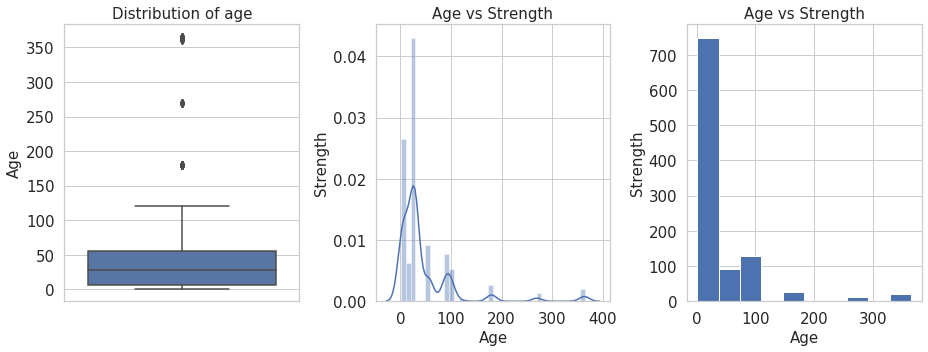

In [28]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Age vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Age vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

**Multivariate Analysis**

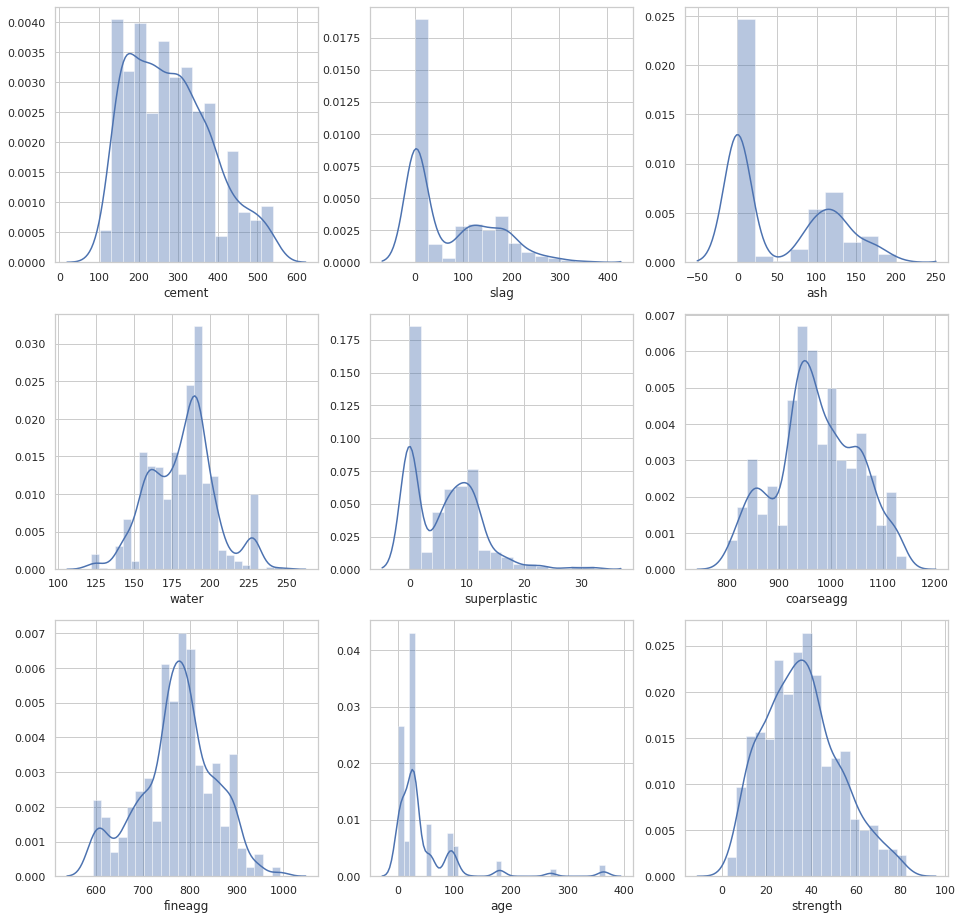

In [29]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(concrete_df['cement'],ax=ax2[0][0])
sns.distplot(concrete_df['slag'],ax=ax2[0][1])
sns.distplot(concrete_df['ash'],ax=ax2[0][2])
sns.distplot(concrete_df['water'],ax=ax2[1][0])
sns.distplot(concrete_df['superplastic'],ax=ax2[1][1])
sns.distplot(concrete_df['coarseagg'],ax=ax2[1][2])
sns.distplot(concrete_df['fineagg'],ax=ax2[2][0])
sns.distplot(concrete_df['age'],ax=ax2[2][1])
sns.distplot(concrete_df['strength'],ax=ax2[2][2])

Observations:


*   Cement is almost normal
*   Slag has 3 Gaussians and right skewed.
*   Ash has 2 Gaussians and right skewed.
*   Water has 3 Gaussians and slightly left skewed.
*   Superplastic has 2 Gaussians and right skewed.
*   Coarseagg has 3 Gaussians and almost normal.
*   Fineagg has almost 2 Gaussians and looks normal
*   Age has multiple Gaussians and right skewed.








array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fafeca150b8>,
      dtype=object)

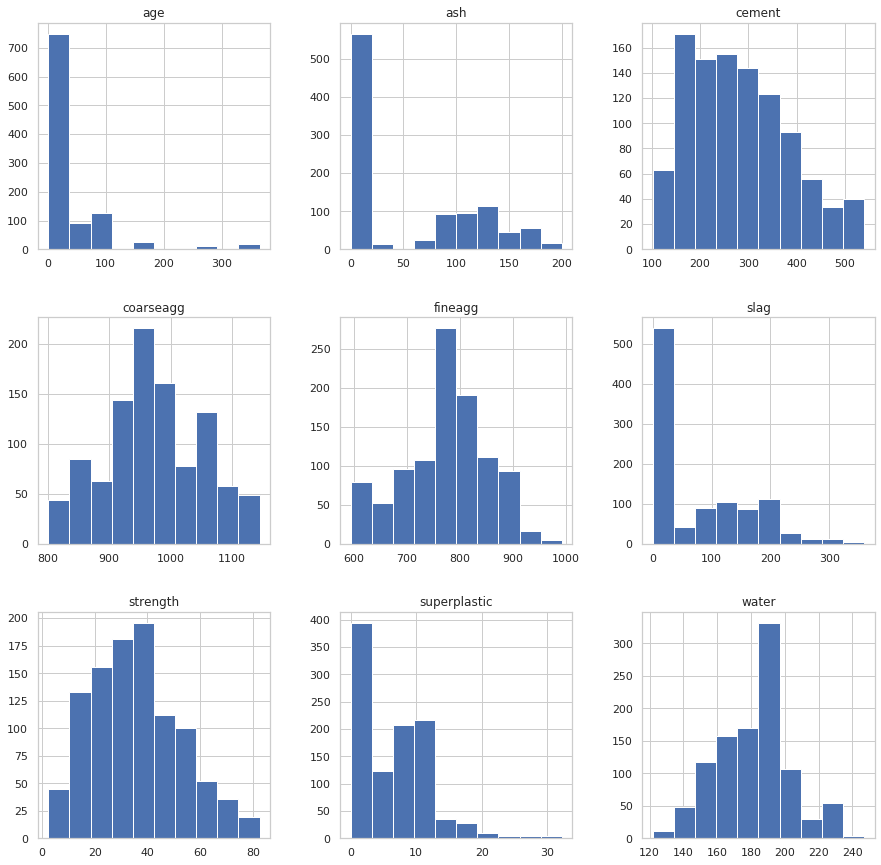

In [30]:
# Histogram 
concrete_df.hist(figsize=(15,15))

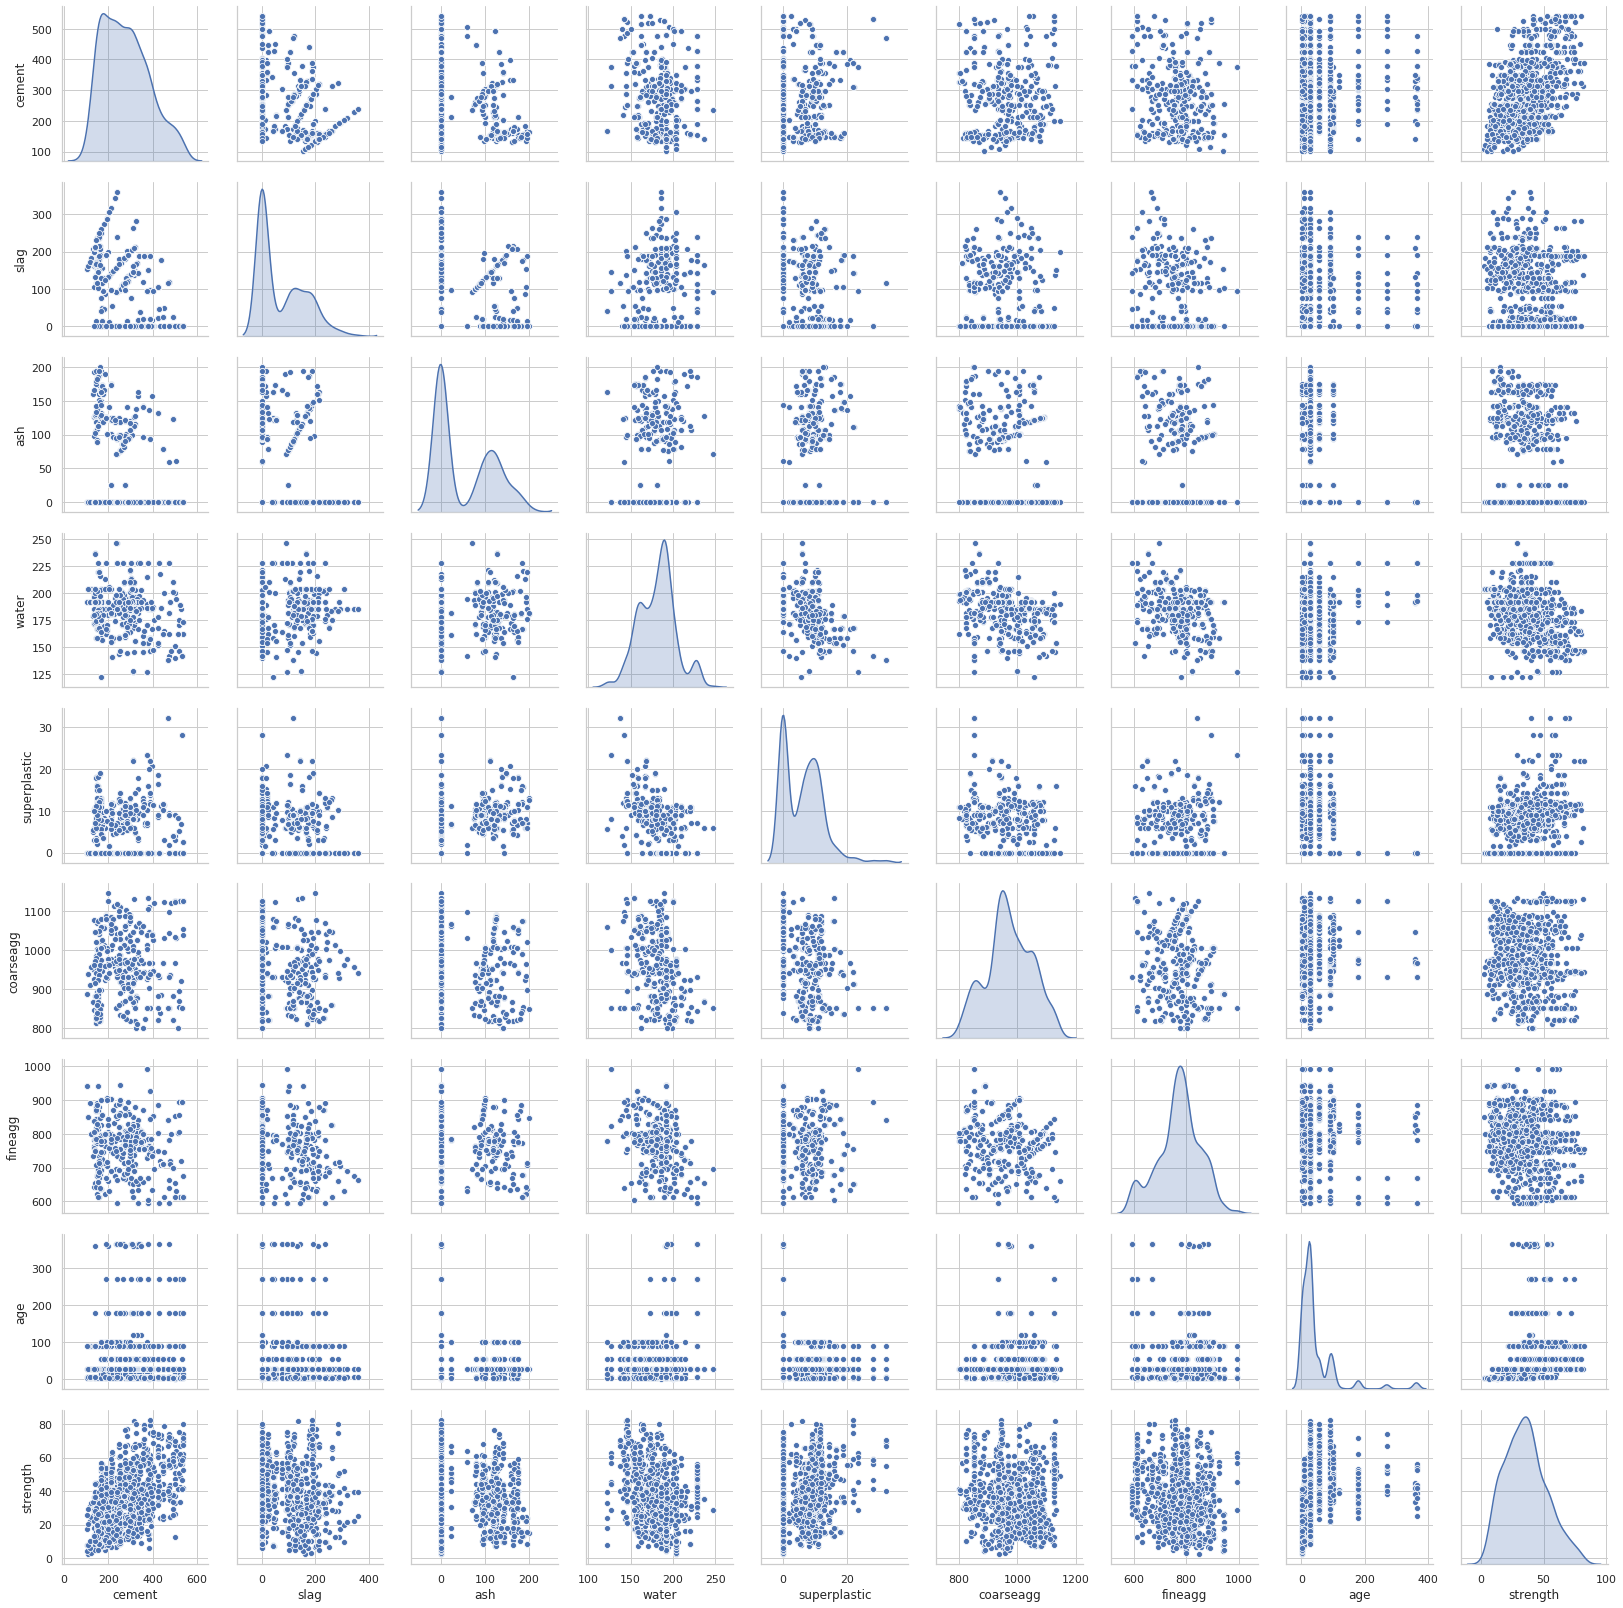

In [31]:
# pairplot- plot density curve instead of histogram in diagonal
sns.pairplot(concrete_df, diag_kind='kde')

•	Cement attribute have almost normal curve.

•	Slag has two Gaussians and rightly skewed. It shows the presence of outliers.

•	Ash has two Gaussians and rightly skewed. It shows the presence of outlies.

•	Water has atleast Gaussians and slighly left skewed. It shows the presence of outlies.

•	Superplastic has multiple Gaussians and rightly skewed. It shows the presence of outlies.

•	Coarseagg has three Gaussians and almost normal.

•	Fineagg has almost two Gaussians and looks like normal.

•	Age has multiple Gaussians and rightly skewed. It shows the presence of outlies.

•	Strength is close to a normal curve.

•	We not only have missing values problem but also outliers problem in the dataset.

**Scatter Plots**

Cement vs other independent attributes: This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

Slag vs other independent attributes: This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

Ash vs other independent attributes: This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

Water vs other independent attributes: This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes. This is true as Superplasticizers allows the reduction of water in the concrete upto the extent of 30% without reducing the workability.
superplastic vs other independent attributes:This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.

Coarseagg vs other independent attributes:This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

Fineagg vs other independent attributes:It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

We can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.
**So, we will not use Linear model**


In [32]:
# corrlation matrix 
cor=concrete_df.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


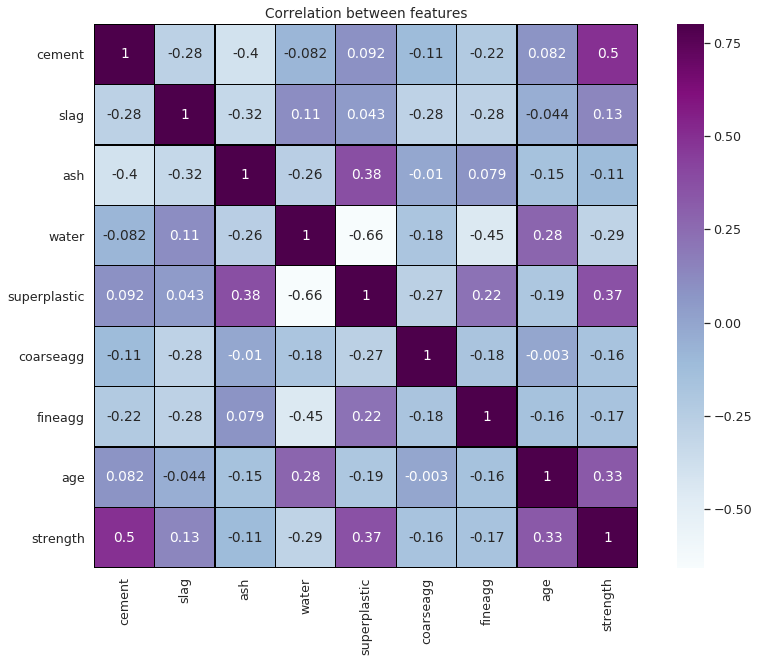

In [33]:
#heatmap
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(cor, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="BuPu",linecolor="black")
plt.title('Correlation between features');

Water shows significant negative relationship with superplastic and fineagg. It also shows some kind of positive relationship with slag and age.

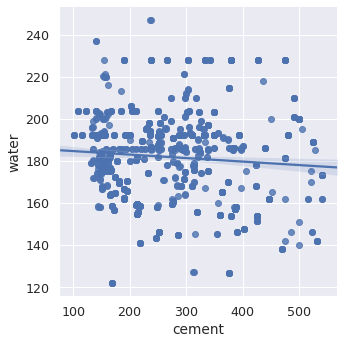

In [34]:
# water vs cement
#lm plot
sns.lmplot(x="cement",y="water",data=concrete_df)
plt.show()

**Checking for Missing Values**

In [35]:
#Checking for missing values
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

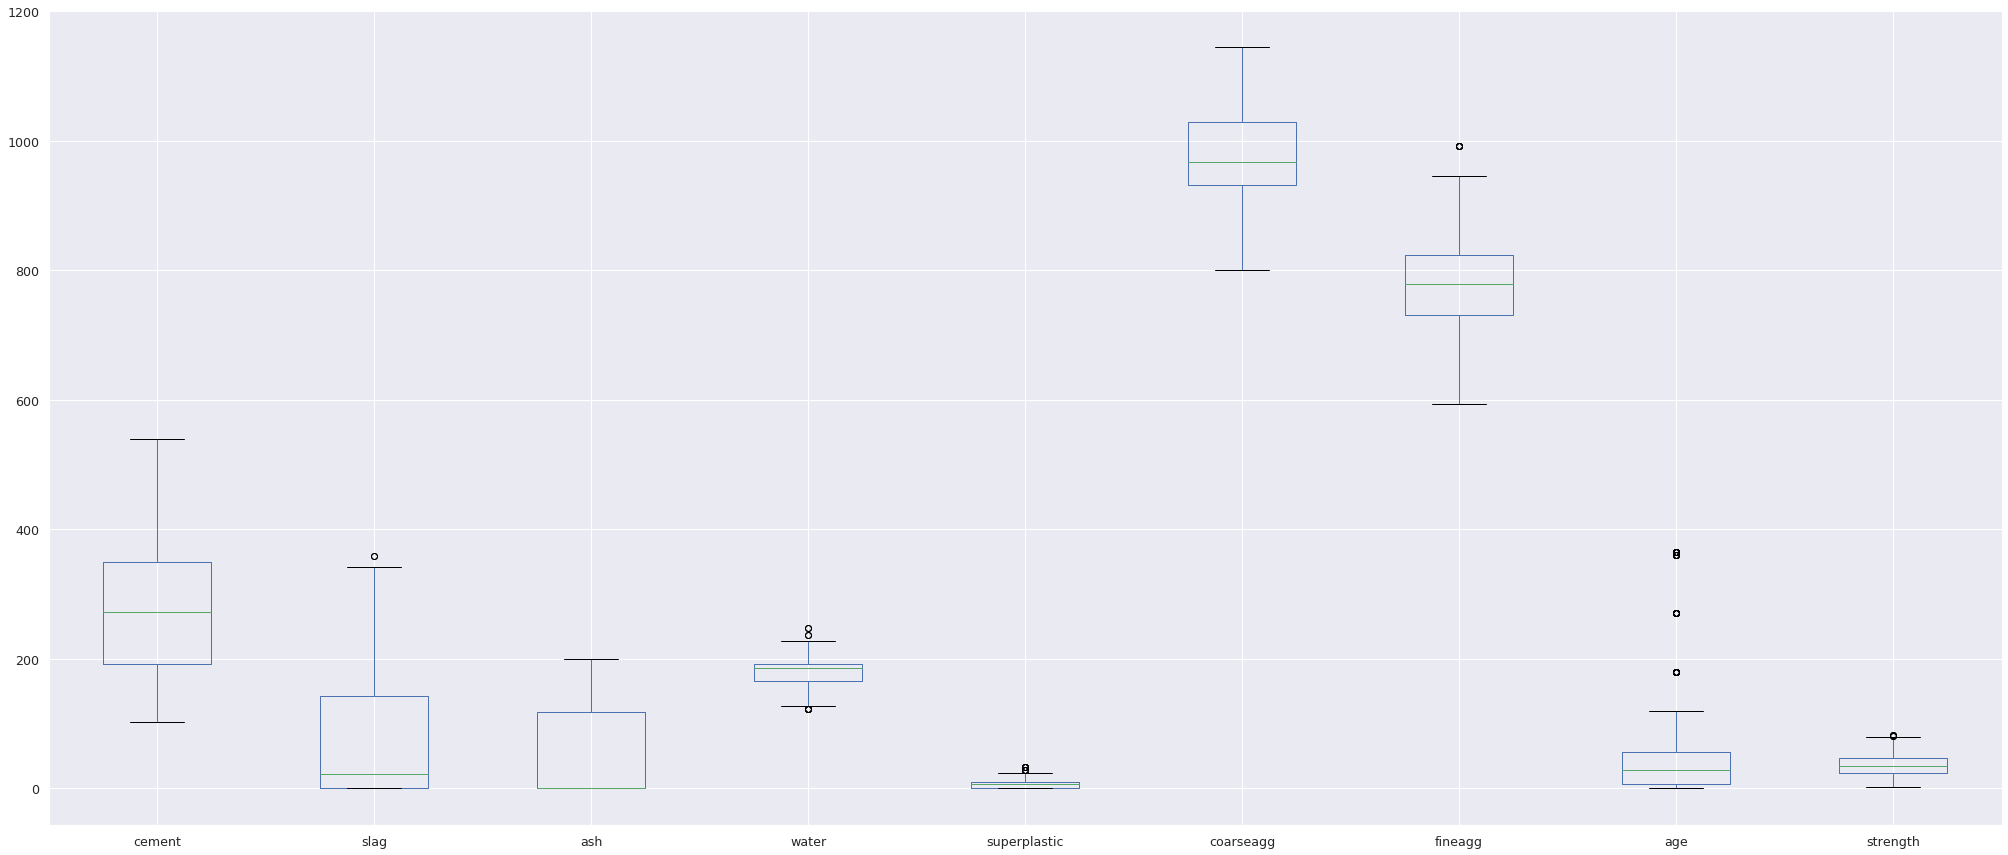

In [36]:
#Creating copy of original dataset
concrete_df1=concrete_df.copy()
# again check for outliers in dataset after handling missing values using boxplot
concrete_df1.boxplot(figsize=(35,15))

Above graph shows that slag, ash, water, superplastic, and age contains outliers.

In [37]:
#Number of outliers present in the dataset
print('Number of outliers in cement: ',concrete_df1[((concrete_df1.cement - concrete_df1.cement.mean()) / concrete_df1.cement.std()).abs() >3]['cement'].count())
print('Number of outliers in slag: ',concrete_df1[((concrete_df1.slag - concrete_df1.slag.mean()) / concrete_df1.slag.std()).abs() >3]['slag'].count())
print('Number of outliers in ash: ',concrete_df1[((concrete_df1.ash - concrete_df1.ash.mean()) / concrete_df1.ash.std()).abs() >3]['ash'].count())
print('Number of outliers in water: ',concrete_df1[((concrete_df1.water - concrete_df1.water.mean()) / concrete_df1.water.std()).abs() >3]['water'].count())
print('Number of outliers in superplastic: ',concrete_df1[((concrete_df1.superplastic - concrete_df1.superplastic.mean()) / concrete_df1.superplastic.std()).abs() >3]['superplastic'].count())
print('Number of outliers in coarseagg: ',concrete_df1[((concrete_df1.coarseagg - concrete_df1.coarseagg.mean()) / concrete_df1.coarseagg.std()).abs() >3]['coarseagg'].count())
print('Number of outliers in fineagg: ',concrete_df1[((concrete_df1.fineagg - concrete_df1.fineagg.mean()) / concrete_df1.fineagg.std()).abs() >3]['fineagg'].count())
print('Number of outliers in age: ',concrete_df1[((concrete_df1.age - concrete_df1.age.mean()) / concrete_df1.age.std()).abs() >3]['age'].count())

Number of outliers in cement:  0
Number of outliers in slag:  4
Number of outliers in ash:  0
Number of outliers in water:  2
Number of outliers in superplastic:  10
Number of outliers in coarseagg:  0
Number of outliers in fineagg:  0
Number of outliers in age:  33


In [38]:
#Records which contains the outliers in slag attribute
print('Records containing outliers in slag: \n',concrete_df1[((concrete_df1.slag - concrete_df1.slag.mean()) / concrete_df1.slag.std()).abs() >3]['slag'])

Records containing outliers in slag: 
 21     342.1
564    342.1
918    359.4
990    359.4
Name: slag, dtype: float64


In [39]:
#Records which contains the outliers in water attribute
print('Records containing outliers in water: \n',concrete_df1[((concrete_df1.water - concrete_df1.water.mean()) / concrete_df1.water.std()).abs() >3]['water'])
#Records which contains the outliers in superplastic attribute
print('Records containing outliers in superplastic: \n',concrete_df1[((concrete_df1.superplastic - concrete_df1.superplastic.mean()) / concrete_df1.superplastic.std()).abs() >3]['superplastic'])
#Records which contains the outliers in age attribute
print('Records containing outliers in age: \n',concrete_df1[((concrete_df1.age - concrete_df1.age.mean()) / concrete_df1.age.std()).abs() >3]['age'])

Records containing outliers in water: 
 66     247.0
263    246.9
Name: water, dtype: float64
Records containing outliers in superplastic: 
 44      28.2
156     28.2
232     32.2
292     32.2
538     28.2
744     32.2
816     32.2
838     28.2
955     32.2
1026    28.2
Name: superplastic, dtype: float64
Records containing outliers in age: 
 64      365
133     365
149     270
157     360
159     365
198     365
256     270
262     270
270     270
297     270
313     270
323     360
361     360
393     365
448     360
465     365
484     365
570     270
601     365
623     270
632     270
713     365
720     365
754     365
755     360
850     270
878     270
901     365
919     360
951     270
957     365
995     365
1028    270
Name: age, dtype: int64


**Handling the outliers**

In [0]:
#Replacing the outliers by median
for col_name in concrete_df1.columns[:-1]:
    q1 = concrete_df1[col_name].quantile(0.25)
    q3 = concrete_df1[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    concrete_df1.loc[(concrete_df1[col_name] < low) | (concrete_df1[col_name] > high), col_name] = concrete_df1[col_name].median()

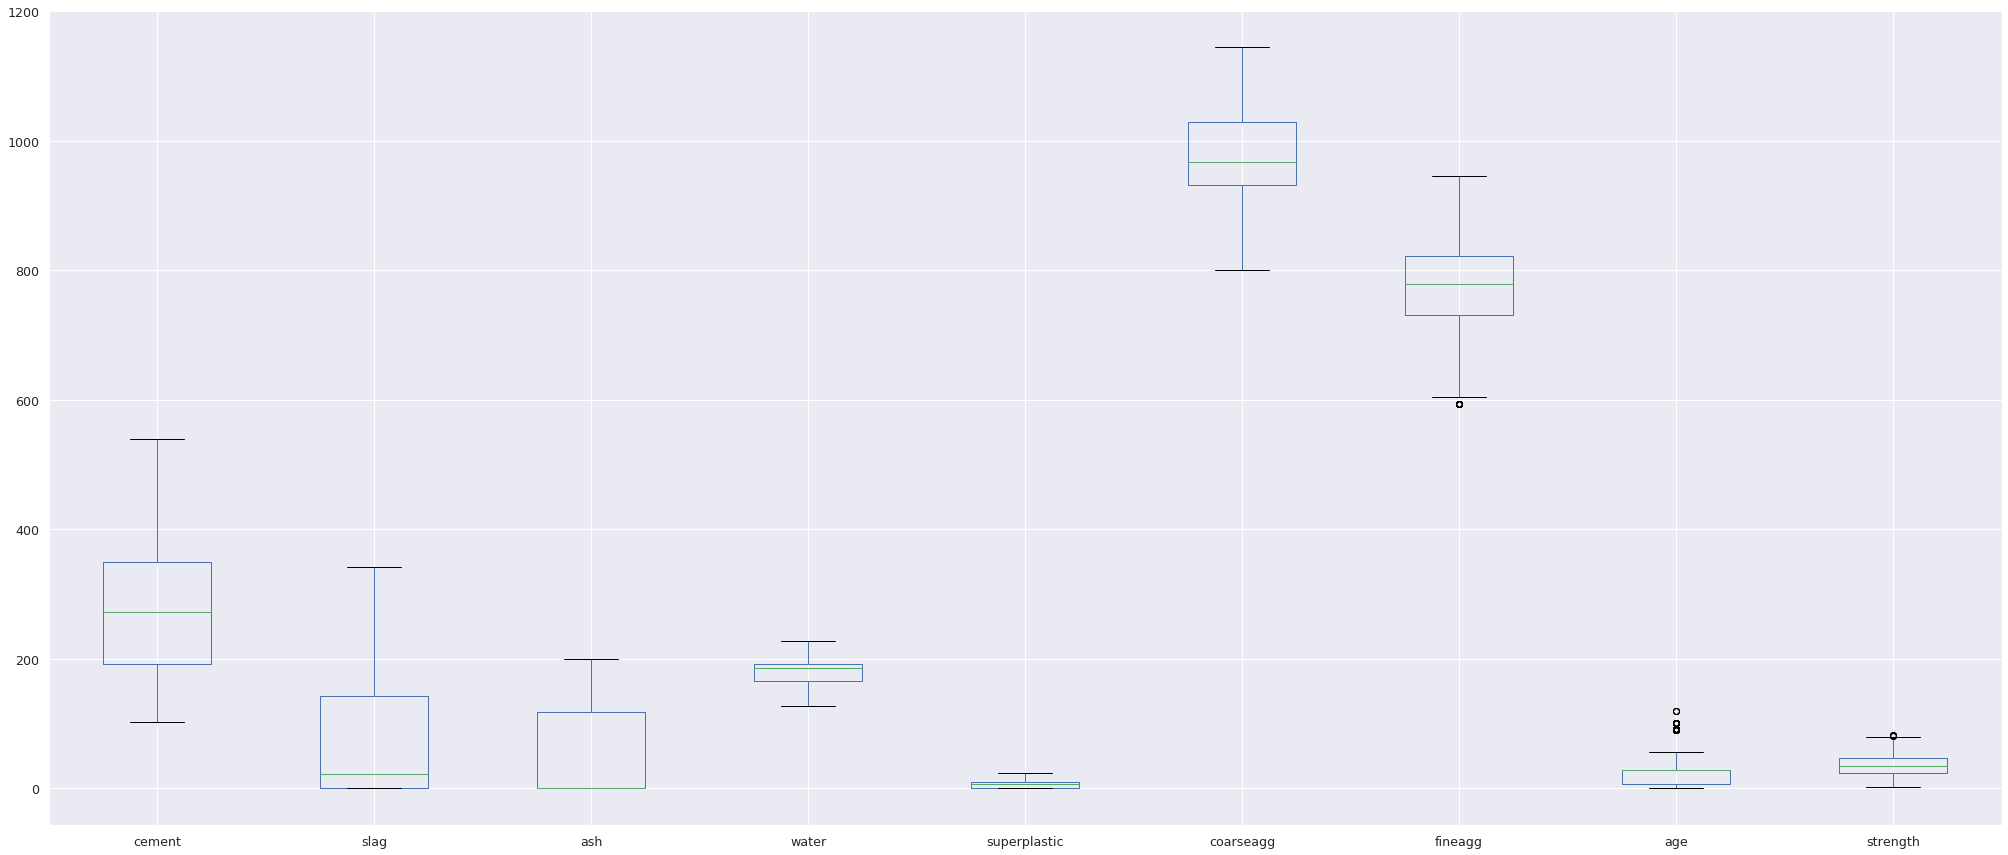

In [41]:
#again check for outliers in dataset using boxplot
concrete_df1.boxplot(figsize=(35,15))

**Feature Engineering, Model Building and Model Tuning**

In [0]:
#Scaling the dataset
concrete_df_z = concrete_df1.apply(zscore)
concrete_df_z=pd.DataFrame(concrete_df_z,columns=concrete_df.columns)

In [0]:
#independent and dependent variables
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]

In [0]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

**DecisionTree Regression**

In [45]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [46]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.350360
slag          0.094473
ash           0.011720
water         0.126769
superplastic  0.020530
coarseagg     0.033709
fineagg       0.033784
age           0.328655


Cement, age and water are significant attributes.

Here, Ash, coarseagg, fineagg, superplastic and slag are the less significant variable.These will impact less to the strength column. This we have seen in pairplot also.

In [47]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.9917907393004437
Performance on testing data using DT: 0.8391894146404316
Accuracy DT:  0.8391894146404316
MSE:  0.167863768404089


There is a overfitting in the model as the dataset is performing 99% accurately in trainnig data. However, the accuracy on test data drops.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


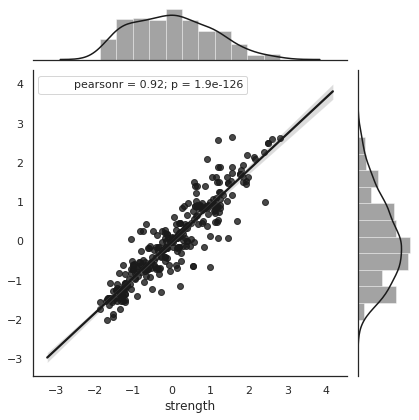

In [48]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [49]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839189


**K fold cross validation**

In [50]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8548966210415868
Standard Deviation:  0.043469062067566


In [51]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839189
2,Decision Tree k fold,0.854897


**Iteration 2**

**Drop the least significant variable**

In [52]:
concrete_df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null float64
strength        1030 non-null float64
dtypes: float64(9)
memory usage: 72.5 KB


In [53]:
#Create a copy of the dataset
concrete_df2=concrete_df_z.copy()
#independent and dependent variable
X = concrete_df2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_df2['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [54]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.368126
slag          0.107591
water         0.163630
superplastic  0.031719
age           0.328935


In [55]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 0.991045963372976
Performance on testing data using DT: 0.8542187400702216
Accuracy DT:  0.8542187400702215


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


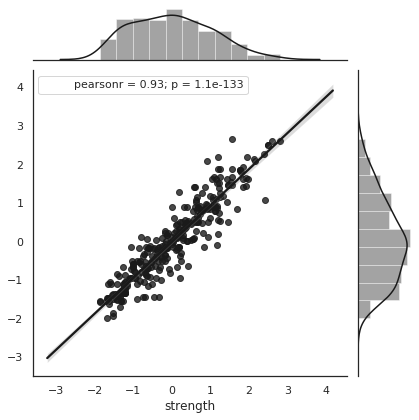

In [56]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [57]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree2'], 'accuracy': [acc_DT]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839189
2,Decision Tree k fold,0.854897
3,Decision Tree2,0.854219


**Regularising/Pruning of Decision Tree**

In [58]:
#independent and dependent variables
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [59]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.416953
slag          0.025822
ash           0.000000
water         0.135128
superplastic  0.017987
coarseagg     0.000000
fineagg       0.007793
age           0.396318


**Visualizing the Regularized Tree**

In [60]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
bank_df=concrete_df_z
xvar = bank_df.drop('strength', axis=1)
feature_cols = xvar.columns

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


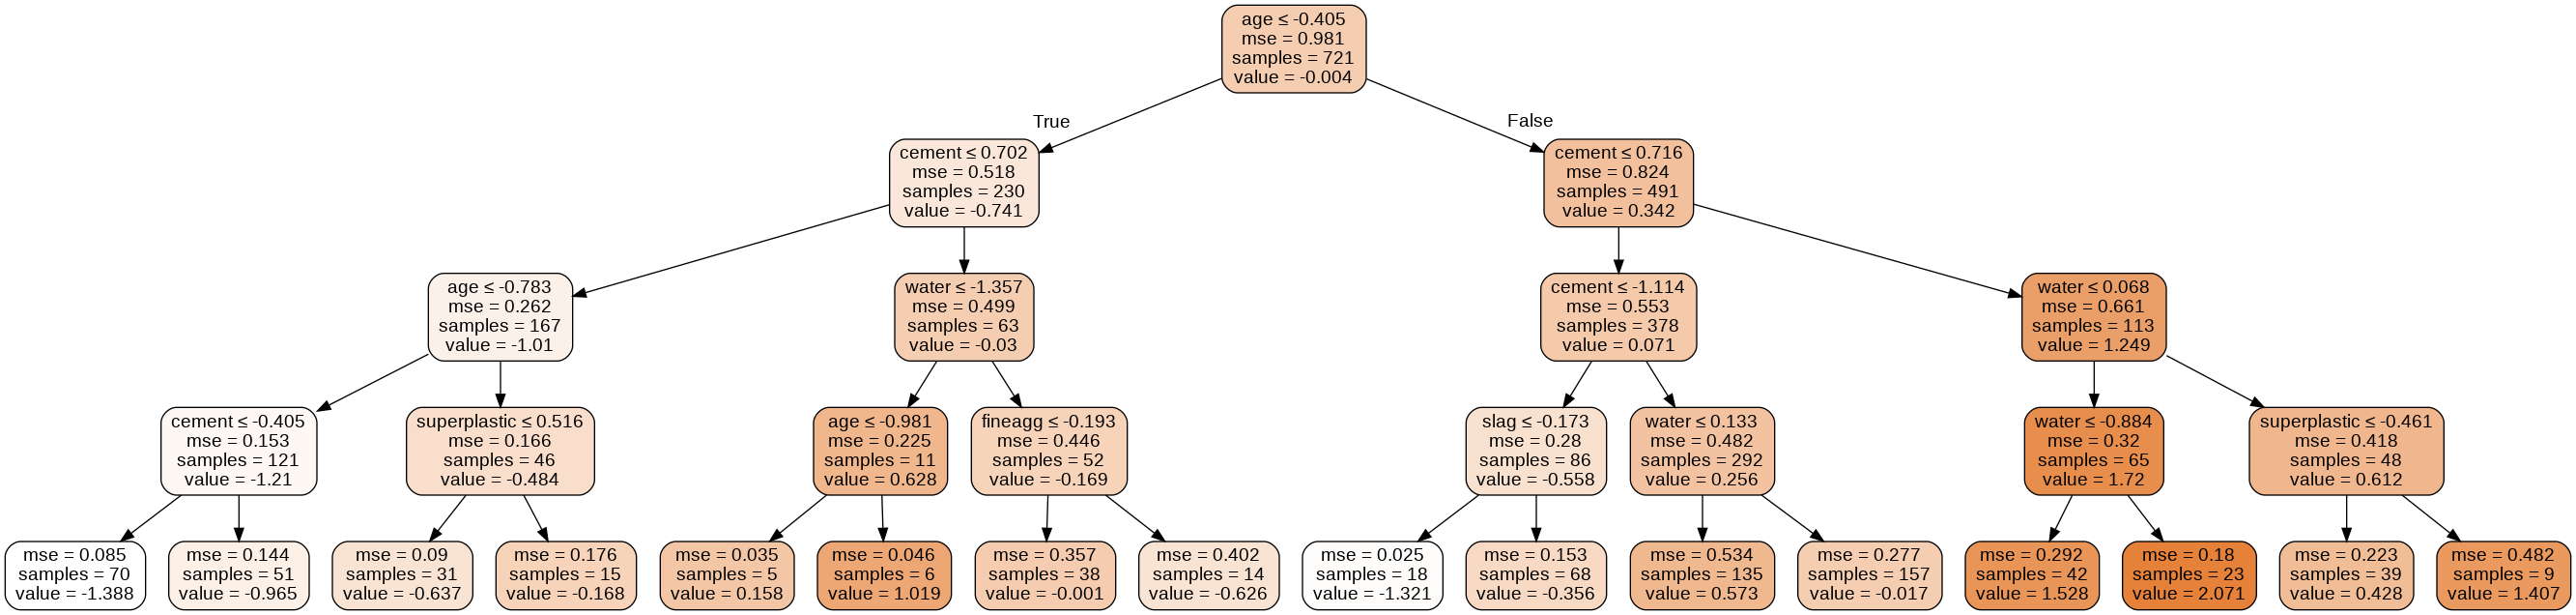

In [61]:
dot_data = StringIO()
export_graphviz(reg_dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('concrete_pruned.png')
Image(graph.create_png())

In [62]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7255811799299218
Performance on testing data using DT: 0.6548277186105129
Accuracy DT:  0.6548277186105129
MSE:  0.36031160369896825


In [63]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_RDT]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839189
2,Decision Tree k fold,0.854897
3,Decision Tree2,0.854219
4,Pruned Decision Tree,0.654828


In [64]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(reg_dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6819101662123233
Standard Deviation:  0.06252311979215476


In [65]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold'], 'accuracy': [accuracy]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839189
2,Decision Tree k fold,0.854897
3,Decision Tree2,0.854219
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910


**Iteration2**

In [66]:
#Create a copy of the dataset
concrete_df3=concrete_df_z.copy()
#independent and dependent variable
X = concrete_df3.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_df3['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [67]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7249584363084667
Performance on testing data using DT: 0.6634677033758938
Accuracy DT:  0.6634677033758938
MSE:  0.35129266754854116


In [68]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree2'], 'accuracy': [acc_RDT]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839189
2,Decision Tree k fold,0.854897
3,Decision Tree2,0.854219
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468


**K Means Clustering**

In [69]:
cluster_range = range( 1, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(concrete_df1)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3.709976e+07
1,2,2.774842e+07
2,3,2.141117e+07
3,4,1.867918e+07
4,5,1.687151e+07
5,6,1.470499e+07
6,7,1.400116e+07
7,8,1.230856e+07
8,9,1.128625e+07
9,10,1.048315e+07


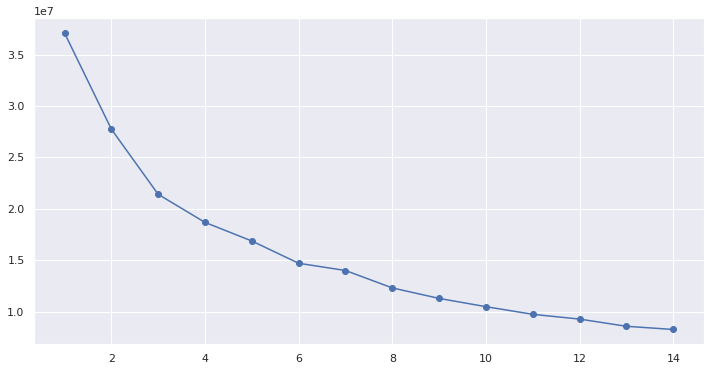

In [70]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [71]:
# k=6
cluster = KMeans( n_clusters = 6, random_state = 2354 )
cluster.fit(concrete_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [72]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(concrete_df_z)
concrete_df_z["GROUP"] = prediction     
# Creating a mirror copy for later re-use instead of building repeatedly
concrete_df_z_copy = concrete_df_z.copy(deep = True)
centroids = cluster.cluster_centers_
centroids

array([[-0.52847035,  0.25047012,  1.10117943,  0.4707871 ,  0.51065443,
        -1.14464266, -0.34207299, -0.2243148 , -0.27815339],
       [-0.60282287, -0.65663952,  1.10691052, -0.61327163,  0.49168022,
         0.62337539,  0.43508059,  0.27502291, -0.13528454],
       [ 0.3112026 , -0.83641215, -0.78154411,  0.44337009, -1.00073639,
         0.49854218,  0.39671798, -0.24628184, -0.68238245],
       [-0.87010755,  1.41482728, -0.84485042,  0.60549346, -0.75810292,
        -0.0430217 , -0.16744124, -0.16350135, -0.56135812],
       [ 1.00454194,  0.50203623, -0.51368191, -1.01583295,  1.02698603,
        -0.6014763 ,  0.15987254,  0.07455196,  1.1935206 ],
       [ 1.45045591, -0.42924132, -0.69489669,  1.30649175, -1.00149369,
         0.19438938, -1.65956143,  0.15842921,  0.70494449]])

In [73]:
centroid_df = pd.DataFrame(centroids, columns = list(concrete_df1) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-0.528470,0.250470,1.101179,0.470787,0.510654,-1.144643,-0.342073,-0.224315,-0.278153
1,-0.602823,-0.656640,1.106911,-0.613272,0.491680,0.623375,0.435081,0.275023,-0.135285
2,0.311203,-0.836412,-0.781544,0.443370,-1.000736,0.498542,0.396718,-0.246282,-0.682382
3,-0.870108,1.414827,-0.844850,0.605493,-0.758103,-0.043022,-0.167441,-0.163501,-0.561358
4,1.004542,0.502036,-0.513682,-1.015833,1.026986,-0.601476,0.159873,0.074552,1.193521
5,1.450456,-0.429241,-0.694897,1.306492,-1.001494,0.194389,-1.659561,0.158429,0.704944


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fafe4a2af60>,
      dtype=object)

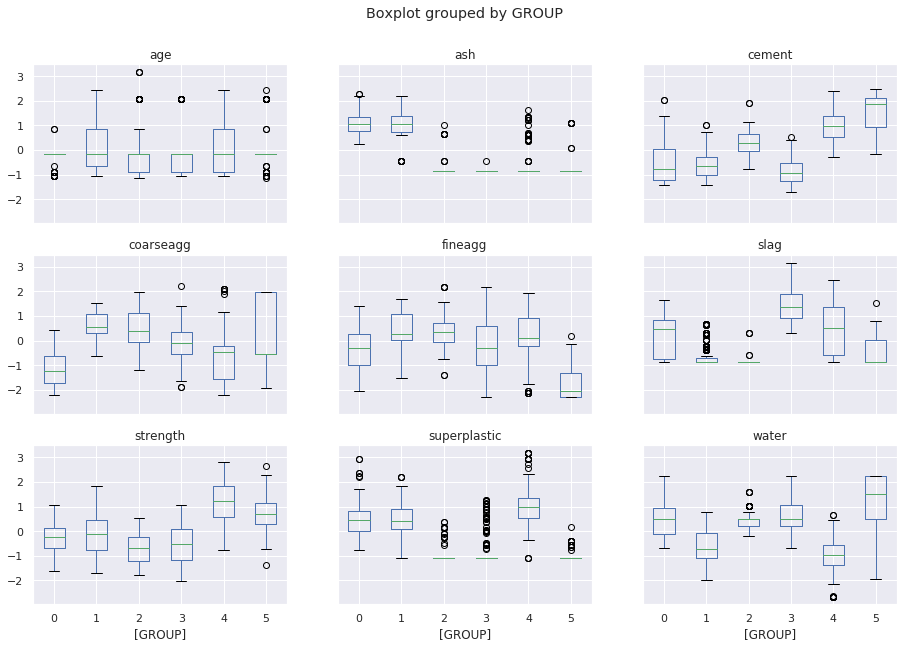

In [74]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.
import matplotlib.pylab as plt
concrete_df_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

In k means, though, there are clusters in datasets on different dimensions. But we can not see any distinct characteristics of these clusters which tell us to break data into different clusters and build separate models for them.

In [0]:
#independent and dependent variables
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

**Random Forest Regressor**

In [76]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [77]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using RFR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9738760785067194
Performance on testing data using RFR: 0.8937676872413185
Accuracy DT:  0.8937676872413185
MSE:  0.11089168232352938


In [78]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839189
2,Decision Tree k fold,0.854897
3,Decision Tree2,0.854219
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.893768


**K fold cross validation**

In [79]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8987422979273024
Standard Deviation:  0.028493314559245097


In [80]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839189
2,Decision Tree k fold,0.854897
3,Decision Tree2,0.854219
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.893768
8,Random Forest Regressor k fold,0.898742


**Gradient Boosting Regressor**

In [81]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [82]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9430469892492805
Performance on testing data using GBR: 0.8915630154648636
Accuracy DT:  0.8915630154648636
MSE:  0.1131930514259573


In [83]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [acc_GBR]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839189
2,Decision Tree k fold,0.854897
3,Decision Tree2,0.854219
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.893768
8,Random Forest Regressor k fold,0.898742
9,Gradient Boost Regressor,0.891563


**K fold cross validation**

In [84]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8992644136432453
Standard Deviation:  0.016791559890436826


In [85]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839189
2,Decision Tree k fold,0.854897
3,Decision Tree2,0.854219
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.893768
8,Random Forest Regressor k fold,0.898742
9,Gradient Boost Regressor,0.891563
10,Gradient Boost Regressor k fold,0.899264


**Ada Boosting Regressor**

In [86]:
model=AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [87]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.815053082611586
Performance on testing data using GBR: 0.7530237086787196
Accuracy DT:  0.7530237086787196
MSE:  0.2578087187168455


In [88]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'accuracy': [acc_ABR]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839189
2,Decision Tree k fold,0.854897
3,Decision Tree2,0.854219
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.893768
8,Random Forest Regressor k fold,0.898742
9,Gradient Boost Regressor,0.891563
10,Gradient Boost Regressor k fold,0.899264


**K Fold Validation**

In [89]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.769933410860869
Standard Deviation:  0.03002404565360191


In [90]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor k fold'], 'accuracy': [accuracy]},index={'12'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839189
2,Decision Tree k fold,0.854897
3,Decision Tree2,0.854219
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.893768
8,Random Forest Regressor k fold,0.898742
9,Gradient Boost Regressor,0.891563
10,Gradient Boost Regressor k fold,0.899264


**Bagging Regressor**

In [91]:
model=BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [92]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_BR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9704458362056815
Performance on testing data using GBR: 0.8804159744719142
Accuracy DT:  0.8804159744719143
MSE:  0.12482900376981208


In [93]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy': [acc_BR]},index={'13'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839189
2,Decision Tree k fold,0.854897
3,Decision Tree2,0.854219
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.893768
8,Random Forest Regressor k fold,0.898742
9,Gradient Boost Regressor,0.891563
10,Gradient Boost Regressor k fold,0.899264


**K fold cross validation**

In [94]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8987997257375057
Standard Deviation:  0.02475506622647627


In [95]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor k fold'], 'accuracy': [accuracy]},index={'14'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839189
2,Decision Tree k fold,0.854897
3,Decision Tree2,0.854219
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.893768
8,Random Forest Regressor k fold,0.898742
9,Gradient Boost Regressor,0.891563
10,Gradient Boost Regressor k fold,0.899264


**KNN Regressor**

Text(0, 0.5, 'Mean error')

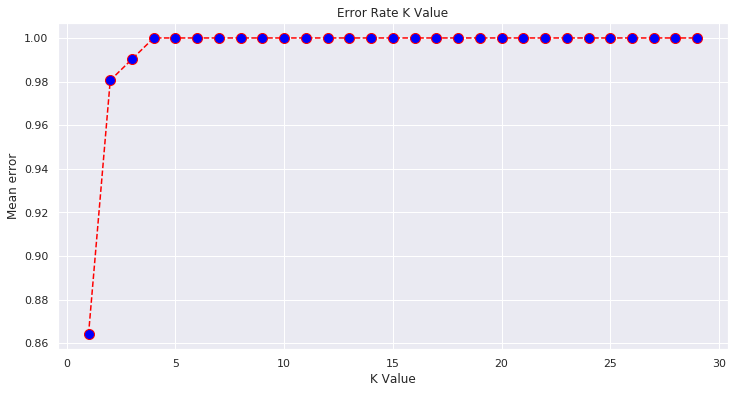

In [96]:
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [97]:
#k=3
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [98]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using KNNR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using KNNR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_K=metrics.r2_score(y_test, y_pred)
print('Accuracy KNNR: ',acc_K)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using KNNR: 0.8902196318573777
Performance on testing data using KNNR: 0.8078817663272165
Accuracy KNNR:  0.8078817663272165
MSE:  0.20054457616295157


In [99]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor'], 'accuracy': [acc_K]},index={'15'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839189
2,Decision Tree k fold,0.854897
3,Decision Tree2,0.854219
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.893768
8,Random Forest Regressor k fold,0.898742
9,Gradient Boost Regressor,0.891563
10,Gradient Boost Regressor k fold,0.899264


**K fold cross validation**

In [100]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7947547097467347
Standard Deviation:  0.03961462765692188


In [101]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor k fold'], 'accuracy': [accuracy]},index={'16'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839189
2,Decision Tree k fold,0.854897
3,Decision Tree2,0.854219
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.893768
8,Random Forest Regressor k fold,0.898742
9,Gradient Boost Regressor,0.891563
10,Gradient Boost Regressor k fold,0.899264


**Support Vector Regressor**

In [102]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [103]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using SVR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using SVR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_S=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using SVR: 0.7195312919938222
Performance on testing data using SVR: 0.6932035001931365
Accuracy SVR:  0.6932035001931365
MSE:  0.32025265299303374


In [104]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Support Vector Regressor'], 'accuracy': [acc_S]},index={'17'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839189
2,Decision Tree k fold,0.854897
3,Decision Tree2,0.854219
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.893768
8,Random Forest Regressor k fold,0.898742
9,Gradient Boost Regressor,0.891563
10,Gradient Boost Regressor k fold,0.899264


**K fold cross validation**

In [105]:
um_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6971192327136142
Standard Deviation:  0.036742110058929286


In [106]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVR k fold'], 'accuracy': [accuracy]},index={'18'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839189
2,Decision Tree k fold,0.854897
3,Decision Tree2,0.854219
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.893768
8,Random Forest Regressor k fold,0.898742
9,Gradient Boost Regressor,0.891563
10,Gradient Boost Regressor k fold,0.899264


**Ensemeble KNN Regressor, SVR, LR**

In [107]:
#Multiple model Ensemble
from sklearn import svm
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear')
evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, y_train)

VotingRegressor(estimators=[('LR',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('KN',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=3,
                                                 p=2, weights='uniform')),
                            ('SVM',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='linear', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False))],
                n_jobs=None, weights=None)

In [108]:
y_pred = evc.predict(X_test)
# performance on train data
print('Performance on training data using ensemble:',evc.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ensemble:',evc.score(X_test,y_test))
#Evaluate the model using accuracy
acc_E=metrics.r2_score(y_test, y_pred)
print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ensemble: 0.8213604308836657
Performance on testing data using ensemble: 0.7849191766894733
Accuracy ensemble:  0.7849191766894733
MSE:  0.22451430937603264


In [109]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'accuracy': [acc_E]},index={'19'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839189
2,Decision Tree k fold,0.854897
3,Decision Tree2,0.854219
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.893768
8,Random Forest Regressor k fold,0.898742
9,Gradient Boost Regressor,0.891563
10,Gradient Boost Regressor k fold,0.899264


**K fold cross validation**

In [110]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(evc,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7803291490734494
Standard Deviation:  0.029918532582796753


In [111]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble k fold'], 'accuracy': [accuracy]},index={'20'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.839189
2,Decision Tree k fold,0.854897
3,Decision Tree2,0.854219
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.893768
8,Random Forest Regressor k fold,0.898742
9,Gradient Boost Regressor,0.891563
10,Gradient Boost Regressor k fold,0.899264




*   After applying all the models we can see that Random Forest Regressor, Random Forest Regressor k fold, Gradient Boost Regressor, Gradient Boost Regressor k fold, Bagging Regressor and Bagging Regressor K Fold are giving better results as compared to other models.

*   Now as the dataset have different gaussians, we can apply k means clustering and then we can apply the models and compare the accuracy.



**Bootstrap Sampling**

In [0]:
concrete_XY = X.join(y)
values = concrete_XY.values

**Using Gradient Boosting Regressor**

In [0]:

# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(concrete_df_z) * 1)    


In [0]:

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)

In [0]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

**Using Random Forest Regressor**

In [0]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(concrete_df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)

In [0]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))